# Agenda: Plotting

1. Plotting with series
    - Line plots
    - Bar plots
    - Pie plots
    - Box plots
    - Histograms
2. Plotting with a data frame
    - All of the above , plus
    - Scatter plots


# How will we be plotting?

We're going to use Pandas, and its API for plotting, which gives us a nicer layer over Matplotlib. If and when we want, we can pass Matplotlib arguments to our Pandas methods, and those will be passed along.

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
np.random.seed(0)

s = Series(np.random.randint(0, 100, 10),
           index=list('abcdefghij'))
s

a    44
b    47
c    64
d    67
e    67
f     9
g    83
h    21
i    36
j    87
dtype: int64

<Axes: >

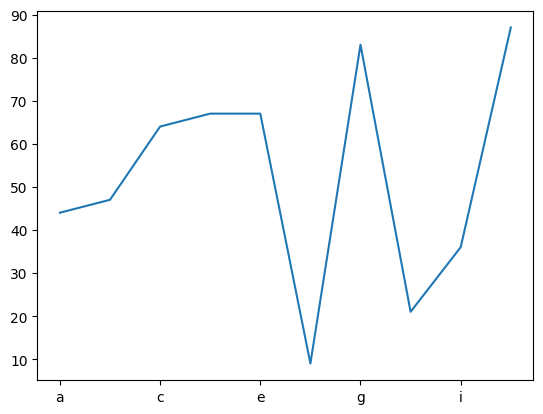

In [4]:
# the easiest way to plot something is with the "plot" method

s.plot()

How did it know what kind of plot to make?

- It took the index (row labels) and used them for the x axis
- It took the values (integers) and used them for the y axis and values
- It assumes that we want to do a "line plot," where it puts the x,y values and then draws lines between them

<Axes: >

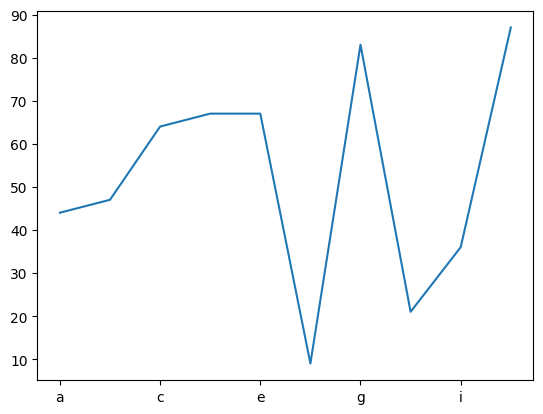

In [5]:
# we can be more explicit about what kind of plot we want, by invoking a method on the "plot" object

s.plot.line()

<Axes: title={'center': 'My amazing plot'}>

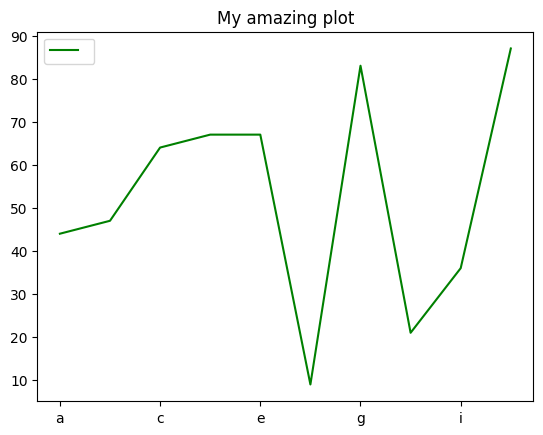

In [6]:
# we can set the title
# and the color and whether we want a legend

s.plot.line(title='My amazing plot', color='green', legend=True)

<Axes: title={'center': 'My amazing plot'}>

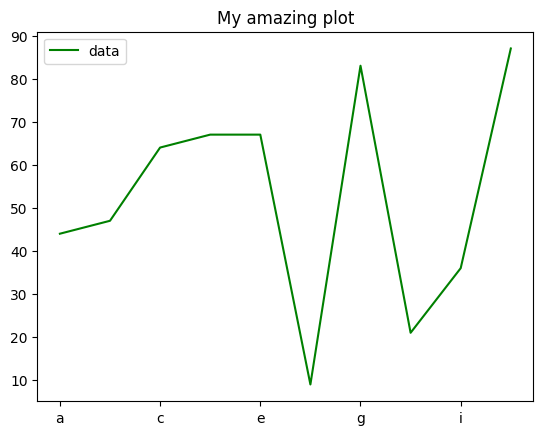

In [8]:
s.name = 'data'
s.plot.line(title='My amazing plot', color='green', legend=True)